# Desafío 1: Preparación del ambiente de trabajo

* Para este desafío trabajaremos de manera conjunta identificando la paleta de colores de carátulas de álbumes.
    * Las imágenes se encuentran en una carpeta con el nombre album_covers.
    * Cada imagen tiene la siguiente nomenclatura: artista-nombre-del-album.jpg. El objetivo es generar un método que nos permita identificar la dominancia de una cantidad finita de colores.
* Para importar imágenes y visualizarlas, vamos a importar las siguientes librerías:
    * Comencemos por incluír las librerías clásicas: pandas, numpy y matplotlib.pyplot.
    * sklearn.cluster.KMeans: para extraer los principales componentes de una matriz numérica.
    * skimage.io: Para poder ingresar y leer imágenes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings(action="ignore")

import statsmodels.api  as sm
import statsmodels.formula.api as smf
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

import lec7_graphs as gfx

In [2]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MiniBatchKMeans
from skimage import io

# Desafío 2: Importación de imágenes
    ● Comencemos por ingresar una imagen a nuestro ambiente de trabajo. Para ello
    ocuparemos io.imread. ¿Qué devuelve?
    ● Para visualizar la imágen en el notebook, ocupe io.imshow.

In [5]:
io.imread('album_covers/dua-lipa-self-titled.jpeg')

array([[[122, 139, 182],
        [122, 139, 182],
        [123, 140, 183],
        ...,
        [229, 211, 233],
        [229, 211, 233],
        [229, 211, 233]],

       [[122, 139, 182],
        [123, 140, 183],
        [123, 140, 183],
        ...,
        [229, 211, 233],
        [229, 211, 233],
        [229, 211, 233]],

       [[123, 140, 183],
        [123, 140, 183],
        [124, 141, 184],
        ...,
        [229, 211, 233],
        [229, 211, 233],
        [229, 211, 233]],

       ...,

       [[ 66, 121, 175],
        [ 67, 122, 176],
        [ 67, 122, 176],
        ...,
        [186, 205, 247],
        [179, 198, 240],
        [181, 200, 242]],

       [[ 66, 121, 175],
        [ 67, 122, 176],
        [ 67, 122, 176],
        ...,
        [198, 217, 255],
        [160, 179, 219],
        [165, 185, 222]],

       [[ 66, 121, 175],
        [ 67, 122, 176],
        [ 67, 122, 176],
        ...,
        [212, 230, 255],
        [173, 191, 229],
        [131, 149, 185]]

* Devuelve una matriz de valores rgb que representan cada uno de los colores de los pixeles de la imagen

In [7]:
imagen = io.imread('album_covers/dua-lipa-self-titled.jpeg')
imagen.shape

(600, 600, 3)

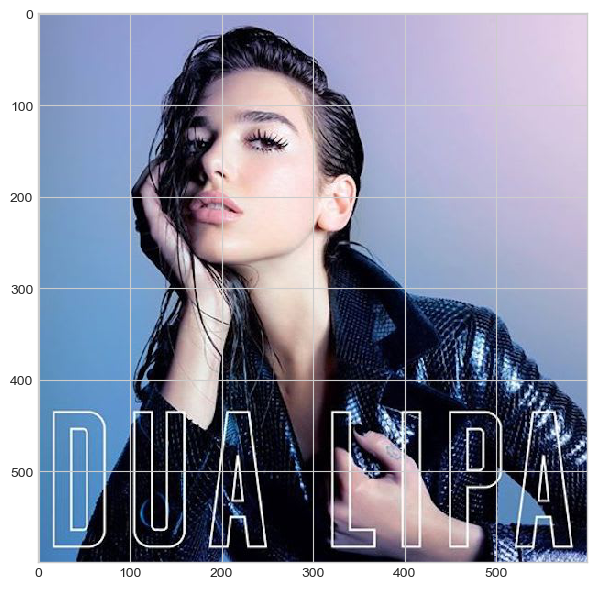

In [8]:
io.imshow('album_covers/dua-lipa-self-titled.jpeg')

# Desafío 3: Preprocesamiento de imágenes y KMeans
    ● Con la representación numérica de la imágen, vamos a extraer la altura, el ancho y la cantidad de canales mediante shape.
    ● Posteriormente redimensionaremos la imágen con reshape.
    ● Partamos por inicializar nuestro algoritmo KMeans con un k=8, ¿Qué significa esto?
    ● Vuelva a implementar el mismo algoritmo con MiniBatchKMeans. ¿Qué diferencia existe con KMeans?

In [9]:
altura, ancho, canales = imagen.shape

In [10]:
imagen2 = imagen.reshape(altura*ancho, canales)

In [11]:
imagen2.shape

(360000, 3)

In [12]:
imagen2

array([[122, 139, 182],
       [122, 139, 182],
       [123, 140, 183],
       ...,
       [212, 230, 255],
       [173, 191, 229],
       [131, 149, 185]], dtype=uint8)

* K means

In [13]:
# instanciamos KMeans en un nuevo objeto
kmeans = KMeans(n_clusters=8, random_state=11238)
# obtenemos los resultados
fit_results_kmeans = kmeans.fit_predict(imagen2)

* Esto significa que instanciamos un objeto kmeans que buscará predetemrinadamente cerrar el ejercicio a 8 clusters (no necesariamente es el determinante)  

In [14]:
# instanciamos MiniBatchKMeans en un nuevo objeto
minikmeans = MiniBatchKMeans(n_clusters=8, random_state=11238)
# obtenemos los resultados
fit_results_minik = minikmeans.fit_predict(imagen2)

* Minibatchkmeans es un proceso similar pero con menos costo computacional al iterar en vez de todo el data set, en solo un subconjunto definido de este. Al usar menos recursos, también baja la caldad de los clusters encontrados

# Desafío 4: Extracción de valores
    ● Ahora extraemos las etiquetas predichas con labels_. Hasta el momento las
    etiquetas hacen referencia a cada centroide. Para imputar sentido en estos,
    debemos extraer los valores de los centroides.
    ● Para extraer los centroides (valores característicos), utilizamos el atributo
    cluster_centers_.
    ● Con las etiquetas, generamos un conteo de ocurrencia con np.unique. Para extraer
    el conteo, debemos implementar la opción return_counts=True.

In [17]:
# Ahora extraemos las etiquetas predichas con labels_. Hasta el momento las etiquetas hacen referencia a cada centroide. 
# Para imputar sentido en estos, debemos extraer los valores de los centroides.
kmeans.labels_

array([6, 6, 6, ..., 4, 1, 2], dtype=int32)

In [18]:
# Para extraer los centroides (valores característicos), utilizamos el atributo cluster_centers_.
kmeans.cluster_centers_

array([[  5.8793072 ,   6.17464443,  19.08147401],
       [193.07017845, 185.02453051, 211.53783215],
       [143.38482814, 162.80892086, 203.76781775],
       [ 37.25659057,  40.87879002,  64.46971517],
       [233.01579899, 216.71247183, 221.42210966],
       [ 94.51275902,  89.007099  , 109.09137567],
       [ 99.56656579, 145.55511092, 192.57026736],
       [174.14138742, 146.44379777, 152.12139918]])

In [19]:
# Con las etiquetas, generamos un conteo de ocurrencia con np.unique. 
# Para extraer el conteo, debemos implementar la opción return_counts=True.
np.unique(kmeans.labels_, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([82278, 64310, 62552, 28283, 44799, 20854, 39994, 16930]))

In [20]:
minikmeans.labels_

array([4, 4, 4, ..., 3, 5, 4], dtype=int32)

In [21]:
minikmeans.cluster_centers_

array([[  5.50225962,   5.70116851,  18.29013008],
       [148.84798571, 165.17763136, 205.17435343],
       [ 90.31865344,  86.19088397, 106.97811608],
       [236.67048155, 220.56564967, 222.16205512],
       [103.82336923, 147.16610967, 193.47107728],
       [198.24671271, 187.79431811, 212.3923186 ],
       [ 34.19945698,  37.74586798,  61.13510945],
       [172.52551811, 145.02089672, 150.93443941]])

In [22]:
np.unique(minikmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([80208, 61349, 21740, 36599, 47085, 66903, 28902, 17214]))

# Desafío 5: Conversión rgb a hex
    ● Con los centroides, vamos a convertirlos a formato hexadecimal. Vamos a generar una función y la pasaremos con map por cada centroide

In [24]:
!pip install colormap

  Preparing metadata (setup.py) ... done
  Created wheel for colormap: filename=colormap-1.0.4-py3-none-any.whl size=15631 sha256=a1d5b677a8c72a853d4b04d91a4e9429cf05863cc08539c9582022e6c30ef367
  Stored in directory: /Users/jorge/Library/Caches/pip/wheels/85/d0/c0/3ac513b77d6a3d9fdc8e5252f1a5abbcfd8f33a4f6dd8d5de4
Successfully built colormap


In [25]:
!pip install easydev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64231 sha256=11342353926e0f83948057083f0b116e73da124a7901e9f827c319143344e722
  Stored in directory: /Users/jorge/Library/Caches/pip/wheels/91/1a/c5/9dfcc86c5bb27991b4dd27741dd03847dfca83ce975c186ddb
Successfully built easydev


In [26]:
import colormap

In [27]:
#Convierto a Hexadecimal
from colormap import rgb2hex
def hexa(rgb):
    lista_hexa= []
    for i in range(len(rgb)):
        lista_hexa.append(rgb2hex(int(rgb[1][0]), int(rgb[i][1]), int(rgb[i][2])))
    return lista_hexa

In [28]:
#Lista de los valores hexagonales
lista_colores_kmenas = hexa(kmeans.cluster_centers_)
lista_colores_minikmeans = hexa(minikmeans.cluster_centers_)
lista_colores_minikmeans

['#940512',
 '#94A5CD',
 '#94566A',
 '#94DCDE',
 '#9493C1',
 '#94BBD4',
 '#94253D',
 '#949196']

In [29]:
#Lista de counts de kmeans
lista_kmeans= list(np.unique(kmeans.labels_, return_counts = True)[1])
lista_kmeans

[82278, 64310, 62552, 28283, 44799, 20854, 39994, 16930]

In [30]:
#lista de counts de minikmeans
lista_minikmeans= list(np.unique(minikmeans.labels_, return_counts = True)[1])
lista_minikmeans

[80208, 61349, 21740, 36599, 47085, 66903, 28902, 17214]

In [31]:
imagen2.shape[0]

360000

In [32]:
#diccionarios apra despues hacer un df
dicc_kmeans = {'colores': lista_colores_kmenas, 'lista_kmeans': lista_kmeans, 'porcentaje': [i/imagen2.shape[0] for i in lista_kmeans]}
dicc_minikmeans = {'colores': lista_colores_minikmeans, 'lista_kmeans': lista_minikmeans, 'porcentaje': [i/imagen2.shape[0] for i in lista_minikmeans]}

In [33]:
df_kmeans= pd.DataFrame(dicc_kmeans).sort_values(by=['porcentaje'], ascending = False)
df_kmeans

,colores,lista_kmeans,porcentaje
0,#C10613,82278,0.228550
1,#C1B9D3,64310,0.178639
2,#C1A2CB,62552,0.173756
4,#C1D8DD,44799,0.124442
6,#C191C0,39994,0.111094
3,#C12840,28283,0.078564
5,#C1596D,20854,0.057928
7,#C19298,16930,0.047028


In [34]:
df_minikmeans= pd.DataFrame(dicc_minikmeans).sort_values(by=['porcentaje'], ascending = False)
df_minikmeans

,colores,lista_kmeans,porcentaje
0,#940512,80208,0.222800
5,#94BBD4,66903,0.185842
1,#94A5CD,61349,0.170414
4,#9493C1,47085,0.130792
3,#94DCDE,36599,0.101664
6,#94253D,28902,0.080283
2,#94566A,21740,0.060389
7,#949196,17214,0.047817


<BarContainer object of 8 artists>

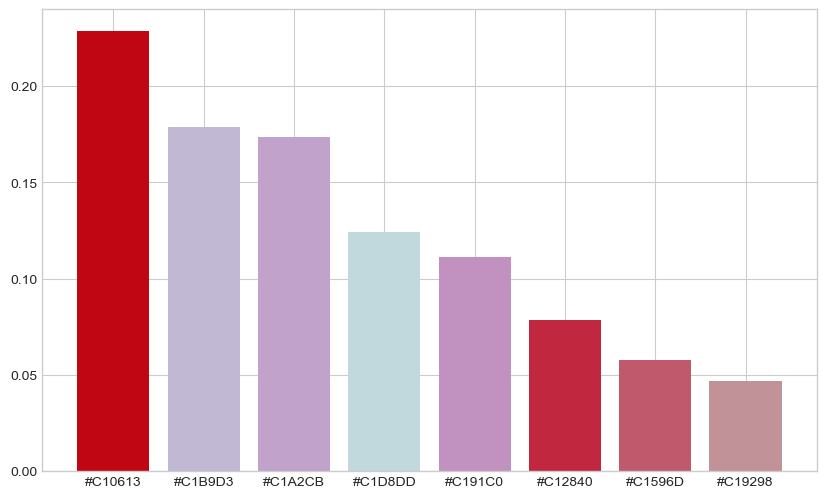

In [35]:
#Gráfico Kmeans
plt.bar(df_kmeans['colores'], df_kmeans['porcentaje'], color = df_kmeans['colores'])

<BarContainer object of 8 artists>

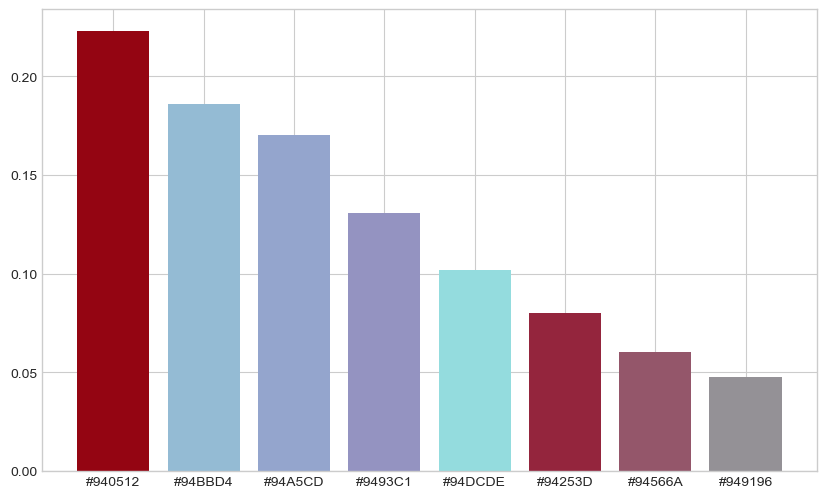

In [36]:
#Gráfico Mini Kmeans
plt.bar(df_minikmeans['colores'], df_minikmeans['porcentaje'], color = df_minikmeans['colores'])